# <div align = "center">Applied Data Science Capstone, Week 2<br>Part 1: Exploratory Data Analysis</div>

In this part of the capstone I will load the dataframes than contain the data I will be using to build a model. A population and rental dataframe about each neighbourhood obtained from webscraping. The second dataframe is the restaurant ratings, obtained from Foursquare API. 

In [2]:
#Libraries used for EDA:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
%matplotlib inline 

In [3]:
#Information about the population
pop_df = pd.read_csv('toronto_merged.csv')
pop_df = pop_df.rename(columns = {'Neighbourhood Number':'nbh_num'})
temp_col = pop_df.pop('Neighbourhood')
pop_df.insert(1, 'Neighbourhood', temp_col)
pop_df

,nbh_num,Neighbourhood,Population 2016,Population density per square kilometre,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),After-tax income: Average amount ($)
0,129,Agincourt North,29113,3929,3840,3705,11305,4230,6045,925,26955
1,128,Agincourt South-Malvern West,23757,3034,3075,3360,9965,3265,4105,555,27928
2,20,Alderwood,12054,2435,1760,1235,5220,1825,2015,320,39159
3,95,Annex,30526,10863,2360,3750,15040,3480,5910,1040,80138
4,42,Banbury-Don Mills,27695,2775,3605,2730,10810,3555,6975,1640,51874
...,...,...,...,...,...,...,...,...,...,...,...
135,94,Wychwood,14349,8541,1860,1320,6420,1595,3150,880,43054
136,100,Yonge-Eglinton,11817,7162,1800,1225,5860,1325,1600,165,65356
137,97,Yonge-St.Clair,12528,10708,1210,920,5960,1540,2905,470,80555
138,27,York University Heights,27593,2086,4045,4750,12290,2965,3530,400,26651


In [4]:
#Information from Foursquare:
fs_df = pd.read_csv('ratings_raw.csv')
fs_df

,nbh_num,venue_id,venue_lon,venue_lat,cat_1,cat_2,price_tier,likes,rating
0,1,4b5f8a3df964a52062c029e3,-79.594387,43.720360,Chinese Restaurant,Buffet,1,37,7.2
1,1,4d277a593c795481fa00c59b,-79.600453,43.731018,Burger Joint,None,1,5,7.1
2,1,561d7a54498ed5c87ce4159d,-79.593053,43.715786,Mediterranean Restaurant,Turkish Restaurant,2,6,6.2
3,1,4c2278a67e85c9287d13bc21,-79.600033,43.720549,Sandwich Place,Fast Food Restaurant,1,1,6.2
4,1,4b60bccff964a5209cf629e3,-79.577358,43.712146,Restaurant,None,2,17,6.6
...,...,...,...,...,...,...,...,...,...
375,139,57470536498e136274e2f257,-79.217342,43.737541,Seafood Restaurant,Fast Food Restaurant,3,0,0.0
376,139,4d642ab4b470a14399e715fe,-79.218378,43.738162,Café,None,1,1,0.0
377,140,4bd5b4e86f649521ca7d6fec,-79.199549,43.747099,Sandwich Place,Fast Food Restaurant,1,0,6.3
378,140,5e4dbeb09ed4790008f8adf6,-79.192126,43.747676,Breakfast Spot,None,1,0,0.0


In [5]:
#Rental information:
rental_df = pd.read_csv('area_rent.csv')
rental_df.columns = ['nbh_num', 'CAD / ft²·month']
rental_df

,nbh_num,CAD / ft²·month
0,1,4.015792
1,2,2.916667
2,3,1.333333
3,17,2.652806
4,19,0.389306
...,...,...
78,133,4.000000
79,137,2.551706
80,138,0.981618
81,139,2.063308


In [6]:
#Merge all the dataframes using the the nbh_num column:
df = fs_df.merge(rental_df, how = 'left', on = 'nbh_num').merge(pop_df, how = 'left', on='nbh_num')

In [7]:
#Columns cleanup:
df.drop(['venue_id', 'venue_lon', 'venue_lat'], axis = 1, inplace = True)

In [12]:
#Drop restaurants with no ratings:
df = df[df['rating'] != 0]

In [9]:
df.to_csv('ratings.csv', index = False)
df.head()

,nbh_num,cat_1,cat_2,price_tier,likes,rating,CAD / ft²·month,Neighbourhood,Population 2016,Population density per square kilometre,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),After-tax income: Average amount ($)
0,1,Chinese Restaurant,Buffet,1,37,7.2,4.015792,West Humber-Clairville,33312,1117,5060,5445,13845,3990,4980,615,28066
1,1,Burger Joint,None,1,5,7.1,4.015792,West Humber-Clairville,33312,1117,5060,5445,13845,3990,4980,615,28066
2,1,Mediterranean Restaurant,Turkish Restaurant,2,6,6.2,4.015792,West Humber-Clairville,33312,1117,5060,5445,13845,3990,4980,615,28066
3,1,Sandwich Place,Fast Food Restaurant,1,1,6.2,4.015792,West Humber-Clairville,33312,1117,5060,5445,13845,3990,4980,615,28066
4,1,Restaurant,None,2,17,6.6,4.015792,West Humber-Clairville,33312,1117,5060,5445,13845,3990,4980,615,28066


In [10]:
df = pd.read_csv('ratings.csv')

In [107]:
categories = df.cat_1.value_counts().to_frame().reset_index()
categories.columns = ['cat_1', 'count']

In [129]:
categories

,cat_1,count
0,Café,32
1,Pizza Place,23
2,Sandwich Place,22
3,Italian Restaurant,20
4,Restaurant,19
5,Indian Restaurant,19
6,Bakery,18
7,Japanese Restaurant,13
8,Middle Eastern Restaurant,12
9,Fast Food Restaurant,8


In [111]:
loc = 1

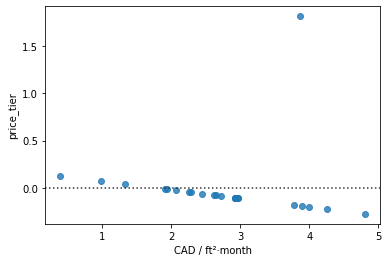

In [137]:
loc = 1
sns.residplot(df[df.cat_1 == categories.cat_1[loc]].iloc[:,6], df[df.cat_1 == categories.cat_1[loc]].price_tier)

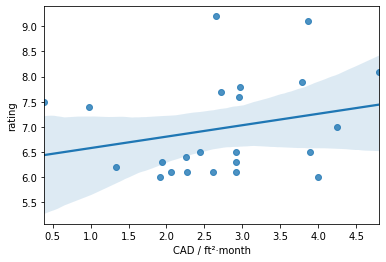

In [138]:
sns.regplot(df[df.cat_1 == categories.cat_1[loc]].iloc[:,6], df[df.cat_1 == categories.cat_1[loc]].rating)

In [13]:
#Make a dataframe averaging the ratings on each neighbourhood:
df_nbh = df.groupby('nbh_num').mean()
df_nbh

,price_tier,likes,rating,CAD / ft²·month,Population 2016,Population density per square kilometre,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),After-tax income: Average amount ($)
nbh_num,,,,,,,,,,,,,
1,1.4,13.200000,6.660000,4.015792,33312.0,1117.0,5060.0,5445.0,13845.0,3990.0,4980.0,615.0,28066.0
2,1.0,1.000000,6.375000,2.916667,32954.0,7291.0,7090.0,5240.0,13615.0,3475.0,3560.0,300.0,24122.0
3,1.4,7.400000,6.800000,1.333333,10360.0,3130.0,1730.0,1410.0,4160.0,1195.0,1880.0,350.0,28842.0
17,1.8,20.800000,8.260000,2.652806,33964.0,4915.0,3505.0,3010.0,17695.0,4620.0,5160.0,565.0,43971.0
19,1.6,17.400000,7.560000,0.389306,10084.0,4584.0,1335.0,1130.0,4705.0,1520.0,1405.0,140.0,39000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,1.0,2.333333,6.266667,4.000000,13362.0,2479.0,2150.0,1850.0,5030.0,1955.0,2385.0,160.0,43854.0
137,1.4,19.400000,7.880000,2.551706,53485.0,4345.0,9625.0,7660.0,21945.0,6245.0,8010.0,1130.0,27341.0
138,1.0,1.000000,6.550000,0.981618,22776.0,7051.0,4180.0,3130.0,9180.0,2825.0,3505.0,560.0,26865.0


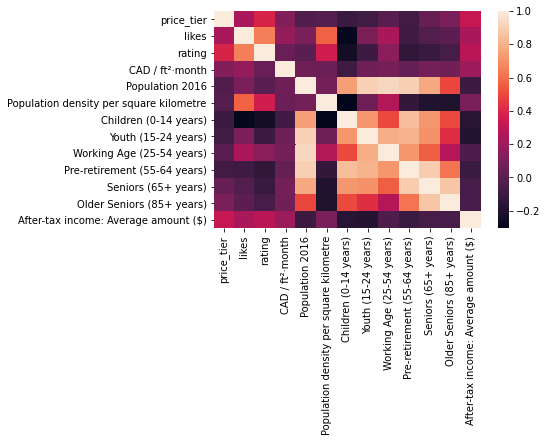

In [15]:
#Cerrelation heatmap of the averaged ratings dataframe:
sns.heatmap(df_nbh.corr())

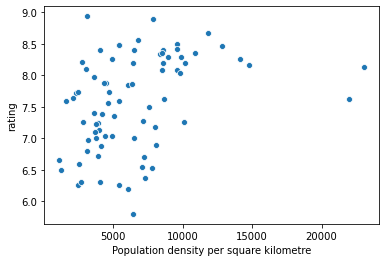

In [16]:
sns.scatterplot(df_nbh.iloc[:,5], df_nbh.iloc[:,2])

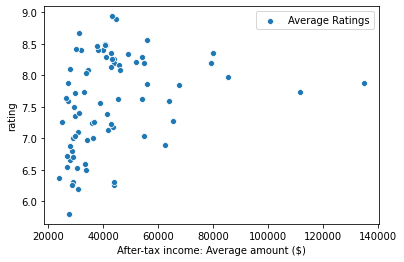

In [17]:
sns.scatterplot(df_nbh.iloc[:,12], df_nbh.iloc[:,2], label = "Average Ratings")

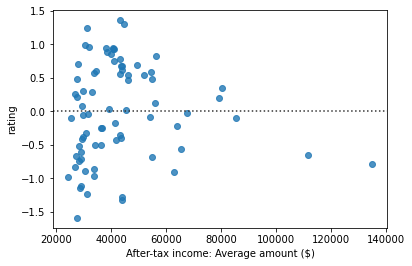

In [18]:
sns.residplot(df_nbh.iloc[:,12], df_nbh.iloc[:,2])

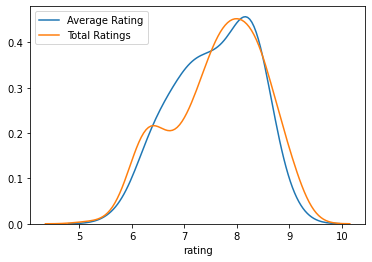

In [19]:
ax1 = sns.distplot(df_nbh.iloc[:,2], hist = False, label = 'Average Rating')
sns.distplot(df.iloc[:,5], hist = False, label = 'Total Ratings', ax = ax1)

In [20]:
lm_totals = LinearRegression()
lm_averaged = LinearRegression()

In [21]:
ratings_total = df.iloc[:,5]
ratings_averaged = df_nbh.iloc[:,2]

In [22]:
predic_total = df.iloc[:,[9,16]]
predic_averaged = df_nbh.iloc[:,[3,5,12]]

In [23]:
df_nbh.iloc[:,[3, 5,12]]

,CAD / ft²·month,Population density per square kilometre,After-tax income: Average amount ($)
nbh_num,,,
1,4.015792,1117.0,28066.0
2,2.916667,7291.0,24122.0
3,1.333333,3130.0,28842.0
17,2.652806,4915.0,43971.0
19,0.389306,4584.0,39000.0
...,...,...,...
133,4.000000,2479.0,43854.0
137,2.551706,4345.0,27341.0
138,0.981618,7051.0,26865.0


In [24]:
lm_totals.fit(predic_total, ratings_total)
lm_averaged.fit(predic_averaged, ratings_averaged)

LinearRegression()

In [25]:
lm_totals.coef_

array([5.63814298e-05, 9.23873116e-06])

In [26]:
ratings_pt = lm_totals.predict(predic_total)
ratings_pa = lm_averaged.predict(predic_averaged)

In [27]:
lm_averaged.coef_

array([-6.79275263e-03,  6.35297303e-05,  1.08059292e-05])

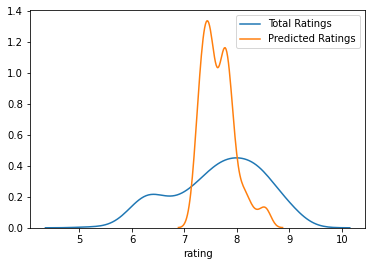

In [28]:
ax2 = sns.distplot(ratings_total, hist = False, label = 'Total Ratings')
sns.distplot(ratings_pt, hist = False, label = 'Predicted Ratings', ax = ax2)

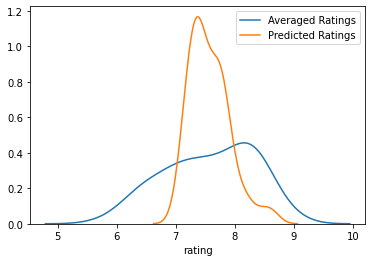

In [29]:
ax3 = sns.distplot(ratings_averaged, hist = False, label = 'Averaged Ratings')
sns.distplot(ratings_pa, hist = False, label = 'Predicted Ratings', ax = ax3)

In [30]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(18000, 145000, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Ratings')

    plt.show()
    plt.close()

           3             2
8.807e-15 x - 2.239e-09 x + 0.0001731 x + 3.825


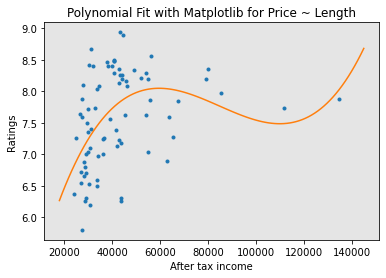

In [31]:
f = np.polyfit(df_nbh.iloc[:,12], df_nbh.iloc[:,2], 3)
p = np.poly1d(f)
print(p)
PlotPolly(p, df_nbh.iloc[:,12], df_nbh.iloc[:,2], 'After tax income')

           5             4             3             2
5.087e-24 x - 2.102e-18 x + 3.326e-13 x - 2.516e-08 x + 0.0009108 x - 4.729


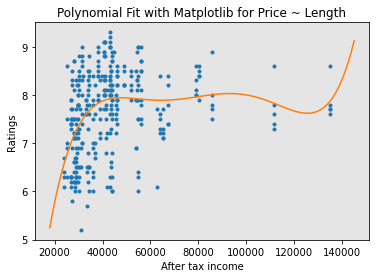

In [32]:
f2 = np.polyfit(df.iloc[:,16], df.iloc[:,5], 5)
p2 = np.poly1d(f2)
print(p2)
PlotPolly(p2, df.iloc[:,16], df.iloc[:,5], 'After tax income')

In [33]:
x_averaged = df_nbh.iloc[:,range(6,12)]
x_averaged

,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years)
nbh_num,,,,,,
1,5060.0,5445.0,13845.0,3990.0,4980.0,615.0
2,7090.0,5240.0,13615.0,3475.0,3560.0,300.0
3,1730.0,1410.0,4160.0,1195.0,1880.0,350.0
17,3505.0,3010.0,17695.0,4620.0,5160.0,565.0
19,1335.0,1130.0,4705.0,1520.0,1405.0,140.0
...,...,...,...,...,...,...
133,2150.0,1850.0,5030.0,1955.0,2385.0,160.0
137,9625.0,7660.0,21945.0,6245.0,8010.0,1130.0
138,4180.0,3130.0,9180.0,2825.0,3505.0,560.0


In [50]:
poly_reg = LinearRegression()

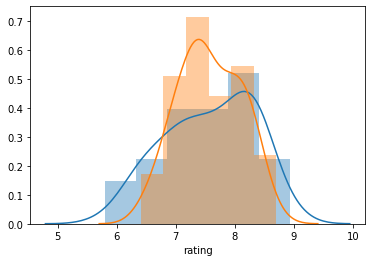

In [60]:
pr = PolynomialFeatures(degree = 2)
Z_pr = pr.fit_transform(x_averaged)
poly_reg.fit(Z_pr, ratings_averaged)
poly_predict=poly_reg.predict(Z_pr)
ax4 = sns.distplot(ratings_averaged, hist = True, label = 'Averaged Ratings')
sns.distplot(poly_predict, hist = True, label = 'Predicted Ratings', ax = ax4)

In [37]:
poly_reg.predict(pr.fit_transform(np.array(x_averaged.loc[3]).reshape(1,-1)))

array([6.80000039])

In [71]:
tier_averaged = df_nbh.iloc[:,1]
tier_averaged

nbh_num
1      13.200000
2       1.000000
3       7.400000
17     20.800000
19     17.400000
         ...    
133     2.333333
137    19.400000
138     1.000000
139     3.666667
140     0.000000
Name: likes, Length: 77, dtype: float64

In [46]:
poly_reg2 = LinearRegression()

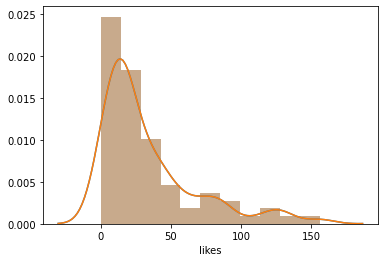

In [72]:
pr2 = PolynomialFeatures(degree = 3)
Z_pr2 = pr2.fit_transform(x_averaged)
poly_reg2.fit(Z_pr2, tier_averaged)
poly_predict2=poly_reg2.predict(Z_pr2)
ax5 = sns.distplot(tier_averaged, hist = True, label = 'Averaged Ratings')
sns.distplot(poly_predict2, hist = True, label = 'Predicted Tier', ax = ax5)

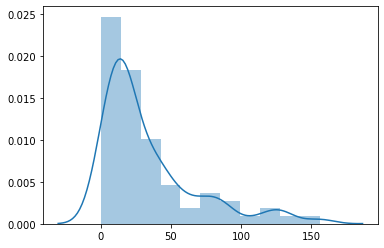

In [73]:
sns.distplot(poly_predict2, hist = True, label = 'Predicted Tier')

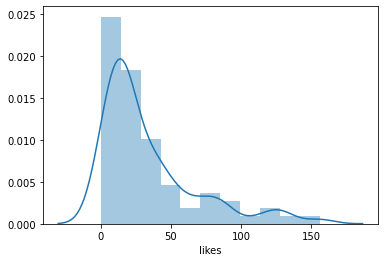

In [74]:
sns.distplot(tier_averaged, hist = True, label = 'Averaged Ratings')